<a href="https://colab.research.google.com/github/parradriana/psychopy/blob/main/CovidSouthKorea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proportion des cas des infections de COVID-19 parmi plusieurs tranches d'âges dans la région de la Corée du Sud.

In [141]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [145]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"

In [146]:
!kaggle datasets download -d kimjihoo/coronavirusdataset/

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.7/dist-packages/kaggle/cli.py", line 67, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 1287, in dataset_download_cli
    quiet=quiet)
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 1225, in dataset_download_files
    'datasets', owner_slug, dataset_slug)
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 384, in get_default_download_dir
    return os.getcwd()
FileNotFoundError: [Errno 2] No such file or directory


In [148]:
!pip install sidetable #or !apt -get install

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
The folder you are executing pip from can no longer be found.


In [149]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sidetable as stb



In [150]:
#fichier qui contient le nombre de cas confirmé et le nombre de décés par jour
time = pd.read_csv("/content/gdrive/MyDrive/Kaggle/Time.csv")

#fichier qui contient le nombre de cas confirmé et le nombre de décés par jour par tranche d'âge 
timeAge = pd.read_csv("/content/gdrive/MyDrive/Kaggle/TimeAge.csv")


In [153]:
# EDA, analyse exploratoire de données des fichiers

time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [154]:
#Le fichier contient 163 lignes et 7 colonnes
time.shape


(163, 7)

In [155]:
timeAge.columns

Index(['date', 'time', 'age', 'confirmed', 'deceased'], dtype='object')

In [156]:
timeAge.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


In [157]:
timeAge.shape

(1089, 5)

In [ ]:
timeAge["age"].unique 

<bound method Series.unique of 0        0s
1       10s
2       20s
3       30s
4       40s
       ... 
1084    40s
1085    50s
1086    60s
1087    70s
1088    80s
Name: age, Length: 1089, dtype: object>

In [ ]:
#Pour voir TOUS les valeurs uniques d ela colonne age
tranches = timeAge["age"]
print(tranches)

0        0s
1       10s
2       20s
3       30s
4       40s
       ... 
1084    40s
1085    50s
1086    60s
1087    70s
1088    80s
Name: age, Length: 1089, dtype: object


In [ ]:
#Connaitre le percentage de decees par tranche d'age

timeAge.stb.freq(["age"], value = "deceased", style = True, cum_cols =False)

,age,deceased,percent
0,80s,"12,136",47.58%
1,70s,"7,599",29.80%
2,60s,"3,743",14.68%
3,50s,"1,537",6.03%
4,40s,295,1.16%
5,30s,194,0.76%


In [ ]:
timeAge.stb.freq(['age'], value='deceased', style=True, cum_cols=False)

,age,deceased,percent
0,80s,"12,136",47.58%
1,70s,"7,599",29.80%
2,60s,"3,743",14.68%
3,50s,"1,537",6.03%
4,40s,295,1.16%
5,30s,194,0.76%


In [ ]:
# comme, avec "groupby" la quantité de filles est reduite... si on desrire avoir la meme taille de df
timeAge.groupby('date')["deceased"].sum()

date
2020-03-02     22
2020-03-03     28
2020-03-04     32
2020-03-05     35
2020-03-06     42
             ... 
2020-06-26    282
2020-06-27    282
2020-06-28    282
2020-06-29    282
2020-06-30    282
Name: deceased, Length: 121, dtype: int64

In [ ]:
#"transform" en combinaison avec "groupby" pour conserver la meme quantité de files de notre df

timeAge.groupby('date')['deceased'].transform('sum')

0        22
1        22
2        22
3        22
4        22
       ... 
1084    282
1085    282
1086    282
1087    282
1088    282
Name: deceased, Length: 1089, dtype: int64

In [ ]:
timeAge["pct_deceased"] = (timeAge["deceased"]/timeAge.groupby('date')['deceased'].transform('sum'))*100



In [158]:
timeAge["pct_confirmed"] = (timeAge["confirmed"]/timeAge.groupby('date')['confirmed'].transform('sum'))*100

timeAge.head()

,date,time,age,confirmed,deceased,pct_confirmed
0,2020-03-02,0,0s,32,0,0.759734
1,2020-03-02,0,10s,169,0,4.012346
2,2020-03-02,0,20s,1235,0,29.320988
3,2020-03-02,0,30s,506,1,12.013295
4,2020-03-02,0,40s,633,1,15.028490


#Integration des fichiers

Nous voulons le 7 colonnes de la table "time" plus le numero de cas confimé par tranche d'age et le nombre de décès para tranche d'age

on amerais savoir les percentages de cas condirmé et de cas décès par tranche d'age

In [ ]:
timeAge.dtypes

date              object
time               int64
age               object
confirmed          int64
deceased           int64
pct_deceased     float64
pct_confirmed    float64
dtype: object

In [ ]:
timeAge["date"].astype(np.datetime64)

0      2020-03-02
1      2020-03-02
2      2020-03-02
3      2020-03-02
4      2020-03-02
          ...    
1084   2020-06-30
1085   2020-06-30
1086   2020-06-30
1087   2020-06-30
1088   2020-06-30
Name: date, Length: 1089, dtype: datetime64[ns]

In [ ]:
#dictionnaire pour connaitre le dat de type object

from numpy.ma.extras import unique

{column: len(timeAge[column].unique()) for column in timeAge.columns if timeAge.dtypes[column] =='object'}

{'age': 9, 'date': 121}

In [ ]:
#elimer les colonnes non necesaires por la jointure

timeAge = timeAge.drop(["time", "confirmed", "deceased"], axis = 1)


In [ ]:
timeAge.head()

,date,age,pct_deceased,pct_confirmed
0,2020-03-02,0s,0.000000,0.759734
1,2020-03-02,10s,0.000000,4.012346
2,2020-03-02,20s,0.000000,29.320988
3,2020-03-02,30s,4.545455,12.013295
4,2020-03-02,40s,4.545455,15.028490


In [ ]:
timeAge.dtypes

date              object
age               object
pct_deceased     float64
pct_confirmed    float64
dtype: object

In [ ]:
print(timeAge.index)

RangeIndex(start=0, stop=1089, step=1)


In [ ]:
print(timeAge.index.name)

None


Je doi trasposer le df originel par rappor a valeurs de deces et cas confirmes.  Avec la fonction "pivot_table" je peut le faire pour chaque colonne d'interet

df pour le cas confirmes

In [ ]:
timeAge_conf = timeAge.pivot_table(index="date", columns="age", values= "pct_confirmed")
timeAge_conf.reset_index(drop = True)

timeAge_conf.head()

age,0s,10s,20s,30s,40s,50s,60s,70s,80s
date,,,,,,,,,
2020-03-02,0.759734,4.012346,29.320988,12.013295,15.028490,19.800570,12.583096,4.558405,1.923077
2020-03-03,0.706567,4.239401,29.447215,12.011638,14.817124,19.783874,12.406484,4.655029,1.932668
2020-03-04,0.638138,4.373123,29.560811,11.843093,14.827327,19.725976,12.124625,4.879880,2.027027
2020-03-05,0.659036,4.457163,29.951439,11.429067,14.689559,19.545612,12.122789,4.994797,2.150538
2020-03-06,0.716104,4.646722,29.869510,11.028008,14.147040,19.366645,12.141948,5.410567,2.673456


In [ ]:
timeAge_conf.index

Index(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
       '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11',
       ...
       '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
       '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29', '2020-06-30'],
      dtype='object', name='date', length=121)

In [ ]:
#Assigner un nouveau index
timeAge_conf.reset_index

<bound method DataFrame.reset_index of age               0s       10s        20s  ...        60s       70s       80s
date                                       ...                               
2020-03-02  0.759734  4.012346  29.320988  ...  12.583096  4.558405  1.923077
2020-03-03  0.706567  4.239401  29.447215  ...  12.406484  4.655029  1.932668
2020-03-04  0.638138  4.373123  29.560811  ...  12.124625  4.879880  2.027027
2020-03-05  0.659036  4.457163  29.951439  ...  12.122789  4.994797  2.150538
2020-03-06  0.716104  4.646722  29.869510  ...  12.141948  5.410567  2.673456
...              ...       ...        ...  ...        ...       ...       ...
2020-06-26  1.460086  5.538803  26.321219  ...  12.958261  6.657673  4.388192
2020-06-27  1.462104  5.532285  26.325773  ...  12.961353  6.662452  4.386312
2020-06-28  1.470704  5.528903  26.291781  ...  13.000393  6.653559  4.372788
2020-06-29  1.489378  5.518539  26.275770  ...  13.051658  6.639492  4.358391
2020-06-30  1.507812  5.5

In [ ]:
timeAge_conf.shape

(121, 9)

In [ ]:
print(timeAge_conf.index.name)

date


In [ ]:
timeAge_conf.columns

Index(['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s'], dtype='object', name='age')

In [ ]:
#renomer colonnes 
timeAge_conf.rename(columns = {'0s':"0s_%confirmed", '10s': '10s_%confirmed', '20s': "20s_%confirmed", '30s': "30s_%confirmed", '40s':'40s_%confirmed', '50s': "50s_%confirmed", 
                          '60s': "60s_%confirmed", '70s': '70s_%confirmed', '80s': '80s_%confirmed'}, inplace = True)

In [ ]:
timeAge_conf.head()

age,0s_%confirmed,10s_%confirmed,20s_%confirmed,30s_%confirmed,40s_%confirmed,50s_%confirmed,60s_%confirmed,70s_%confirmed,80s_%confirmed
date,,,,,,,,,
2020-03-02,0.759734,4.012346,29.320988,12.013295,15.028490,19.800570,12.583096,4.558405,1.923077
2020-03-03,0.706567,4.239401,29.447215,12.011638,14.817124,19.783874,12.406484,4.655029,1.932668
2020-03-04,0.638138,4.373123,29.560811,11.843093,14.827327,19.725976,12.124625,4.879880,2.027027
2020-03-05,0.659036,4.457163,29.951439,11.429067,14.689559,19.545612,12.122789,4.994797,2.150538
2020-03-06,0.716104,4.646722,29.869510,11.028008,14.147040,19.366645,12.141948,5.410567,2.673456


Meme procedure avec une df pour les deces 

In [ ]:
timeAge_dec = timeAge.pivot_table(index="date", columns="age", values= "pct_deceased")
timeAge_dec.reset_index
timeAge_dec.head()


age,0s,10s,20s,30s,40s,50s,60s,70s,80s
date,,,,,,,,,
2020-03-02,0.0,0.0,0.0,4.545455,4.545455,22.727273,27.272727,27.272727,13.636364
2020-03-03,0.0,0.0,0.0,3.571429,3.571429,17.857143,25.000000,32.142857,17.857143
2020-03-04,0.0,0.0,0.0,3.125000,3.125000,15.625000,21.875000,37.500000,18.750000
2020-03-05,0.0,0.0,0.0,2.857143,2.857143,14.285714,22.857143,37.142857,20.000000
2020-03-06,0.0,0.0,0.0,2.380952,2.380952,11.904762,26.190476,33.333333,23.809524


In [ ]:
timeAge_dec.columns

Index(['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s'], dtype='object', name='age')

In [ ]:
timeAge_dec.shape

(121, 9)

In [ ]:
#renomer colonnes 
timeAge_dec.rename(columns = {'0s':"0s_%deceased", '10s': '10s_%deceased', '20s': "20s_%deceased", '30s': "30s_deceased", '40s':'40s_%deceased', '50s': "50s_%deceased", 
                          '60s': "60s_%deceased", '70s': '70s_%deceased', '80s': '80s_%deceased'}, inplace = True)

timeAge.head()

In [ ]:
timeAge_dec.head()

age,0s_%deceased,10s_%deceased,20s_%deceased,30s_deceased,40s_%deceased,50s_%deceased,60s_%deceased,70s_%deceased,80s_%deceased
date,,,,,,,,,
2020-03-02,0.0,0.0,0.0,4.545455,4.545455,22.727273,27.272727,27.272727,13.636364
2020-03-03,0.0,0.0,0.0,3.571429,3.571429,17.857143,25.000000,32.142857,17.857143
2020-03-04,0.0,0.0,0.0,3.125000,3.125000,15.625000,21.875000,37.500000,18.750000
2020-03-05,0.0,0.0,0.0,2.857143,2.857143,14.285714,22.857143,37.142857,20.000000
2020-03-06,0.0,0.0,0.0,2.380952,2.380952,11.904762,26.190476,33.333333,23.809524


In [ ]:
timeAge_etl = pd.merge(timeAge_conf, timeAge_dec, on = 'date')

In [ ]:
#Jointure

data = pd.merge(time, timeAge_etl,on ="date")


In [ ]:
data.head()

,date,time,test,negative,confirmed,released,deceased,0s_%confirmed,10s_%confirmed,20s_%confirmed,30s_%confirmed,40s_%confirmed,50s_%confirmed,60s_%confirmed,70s_%confirmed,80s_%confirmed,0s_%deceased,10s_%deceased,20s_%deceased,30s_deceased,40s_%deceased,50s_%deceased,60s_%deceased,70s_%deceased,80s_%deceased
0,2020-03-02,0,109591,71580,4212,31,22,0.759734,4.012346,29.320988,12.013295,15.028490,19.800570,12.583096,4.558405,1.923077,0.0,0.0,0.0,4.545455,4.545455,22.727273,27.272727,27.272727,13.636364
1,2020-03-03,0,125851,85484,4812,34,28,0.706567,4.239401,29.447215,12.011638,14.817124,19.783874,12.406484,4.655029,1.932668,0.0,0.0,0.0,3.571429,3.571429,17.857143,25.000000,32.142857,17.857143
2,2020-03-04,0,136707,102965,5328,41,32,0.638138,4.373123,29.560811,11.843093,14.827327,19.725976,12.124625,4.879880,2.027027,0.0,0.0,0.0,3.125000,3.125000,15.625000,21.875000,37.500000,18.750000
3,2020-03-05,0,146541,118965,5766,88,35,0.659036,4.457163,29.951439,11.429067,14.689559,19.545612,12.122789,4.994797,2.150538,0.0,0.0,0.0,2.857143,2.857143,14.285714,22.857143,37.142857,20.000000
4,2020-03-06,0,164740,136624,6284,108,42,0.716104,4.646722,29.869510,11.028008,14.147040,19.366645,12.141948,5.410567,2.673456,0.0,0.0,0.0,2.380952,2.380952,11.904762,26.190476,33.333333,23.809524


In [ ]:
data.shape

(121, 25)

In [ ]:
data.columns


Index(['date', 'time', 'test', 'negative', 'confirmed', 'released', 'deceased',
       '0s_%confirmed', '10s_%confirmed', '20s_%confirmed', '30s_%confirmed',
       '40s_%confirmed', '50s_%confirmed', '60s_%confirmed', '70s_%confirmed',
       '80s_%confirmed', '0s_%deceased', '10s_%deceased', '20s_%deceased',
       '30s_deceased', '40s_%deceased', '50s_%deceased', '60s_%deceased',
       '70s_%deceased', '80s_%deceased'],
      dtype='object')

#sqlite

In [ ]:
import sqlite3

conn = sqlite3.connect('covid_cases')
cur = conn.cursor()

#cur.close()
#conn.close()

In [ ]:
cur.execute("""CREATE TABLE IF NOT EXISTS percentages (
       'date' TEXT, 'time' TEXT, 'test' INTEGER, 'negative' INTEGER, 'confirmed' INTEGER, 'released' INTEGER, 'deceased' INTEGER,
       '0s_%confirmed' REAL, '10s_%confirmed' REAL, '20s_%confirmed' REAL, '30s_%confirmed' REAL,
       '40s_%confirmed' REAL, '50s_%confirmed' REAL, '60s_%confirmed' REAL, '70s_%confirmed' REAL,
       '80s_%confirmed' REAL, '0s_%deceased' REAL, '10s_%deceased' REAL, '20s_%deceased' REAL, '30s_deceased' REAL,
       '40s_%deceased' REAL, '50s_%deceased' REAL, '60s_%deceased' REAL, '70s_%deceased' REAL, '80s_%deceased' REAL
       ); """)

conn.commit()

In [ ]:
data.to_sql('percentages', conn, if_exists='replace')

In [ ]:
conn.execute("SELECT * FROM percentages").fetchall()

#Visualisation

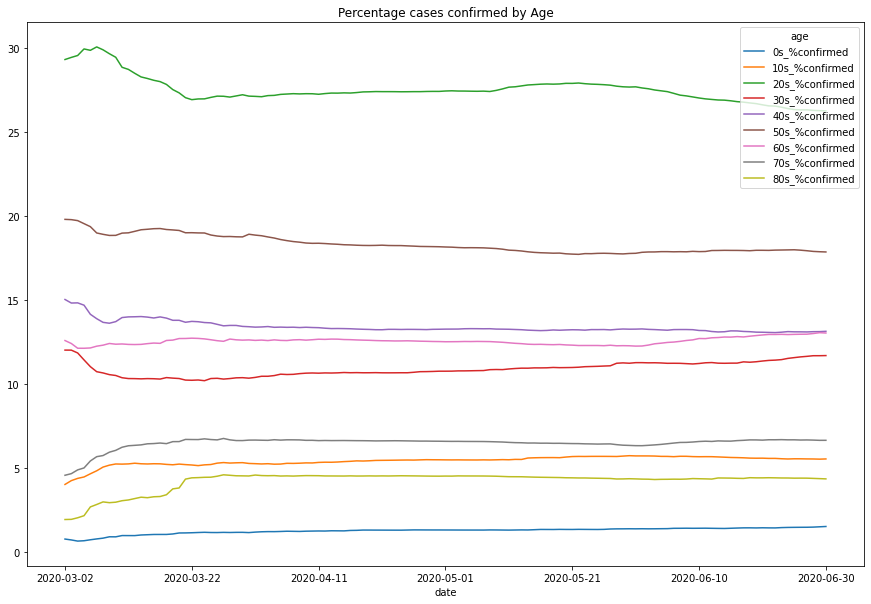

In [ ]:
from numpy.lib.shape_base import column_stack
timeAge_conf.plot(title = "Percentage cases confirmed by Age", figsize = (15, 10));

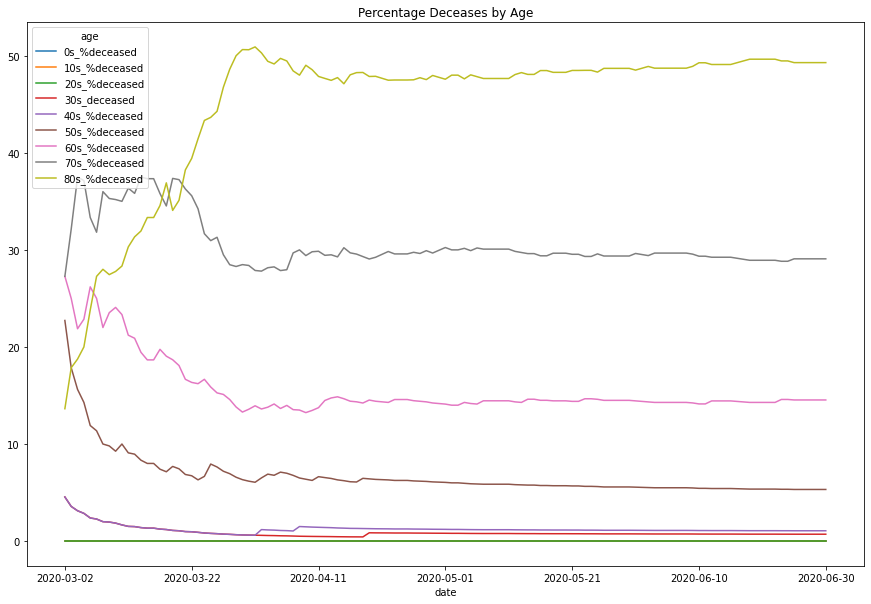

In [ ]:
timeAge_dec.plot(title ="Percentage Deceases by Age", figsize = (15, 10))